In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/Users/harikrishnans/Downloads/hospital_readmissions.csv')

In [3]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,25000.0,4.45332,3.001470,1.0,2.0,4.0,6.0,14.0
n_lab_procedures,25000.0,43.24076,19.818620,1.0,31.0,44.0,57.0,113.0
n_procedures,25000.0,1.35236,1.715179,0.0,0.0,1.0,2.0,6.0
n_medications,25000.0,16.25240,8.060532,1.0,11.0,15.0,20.0,79.0
n_outpatient,25000.0,0.36640,1.195478,0.0,0.0,0.0,0.0,33.0
n_inpatient,25000.0,0.61596,1.177951,0.0,0.0,0.0,1.0,15.0
n_emergency,25000.0,0.18660,0.885873,0.0,0.0,0.0,0.0,64.0


In [6]:
#Split the data into numerical and categorical features
numerical_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
categorical_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

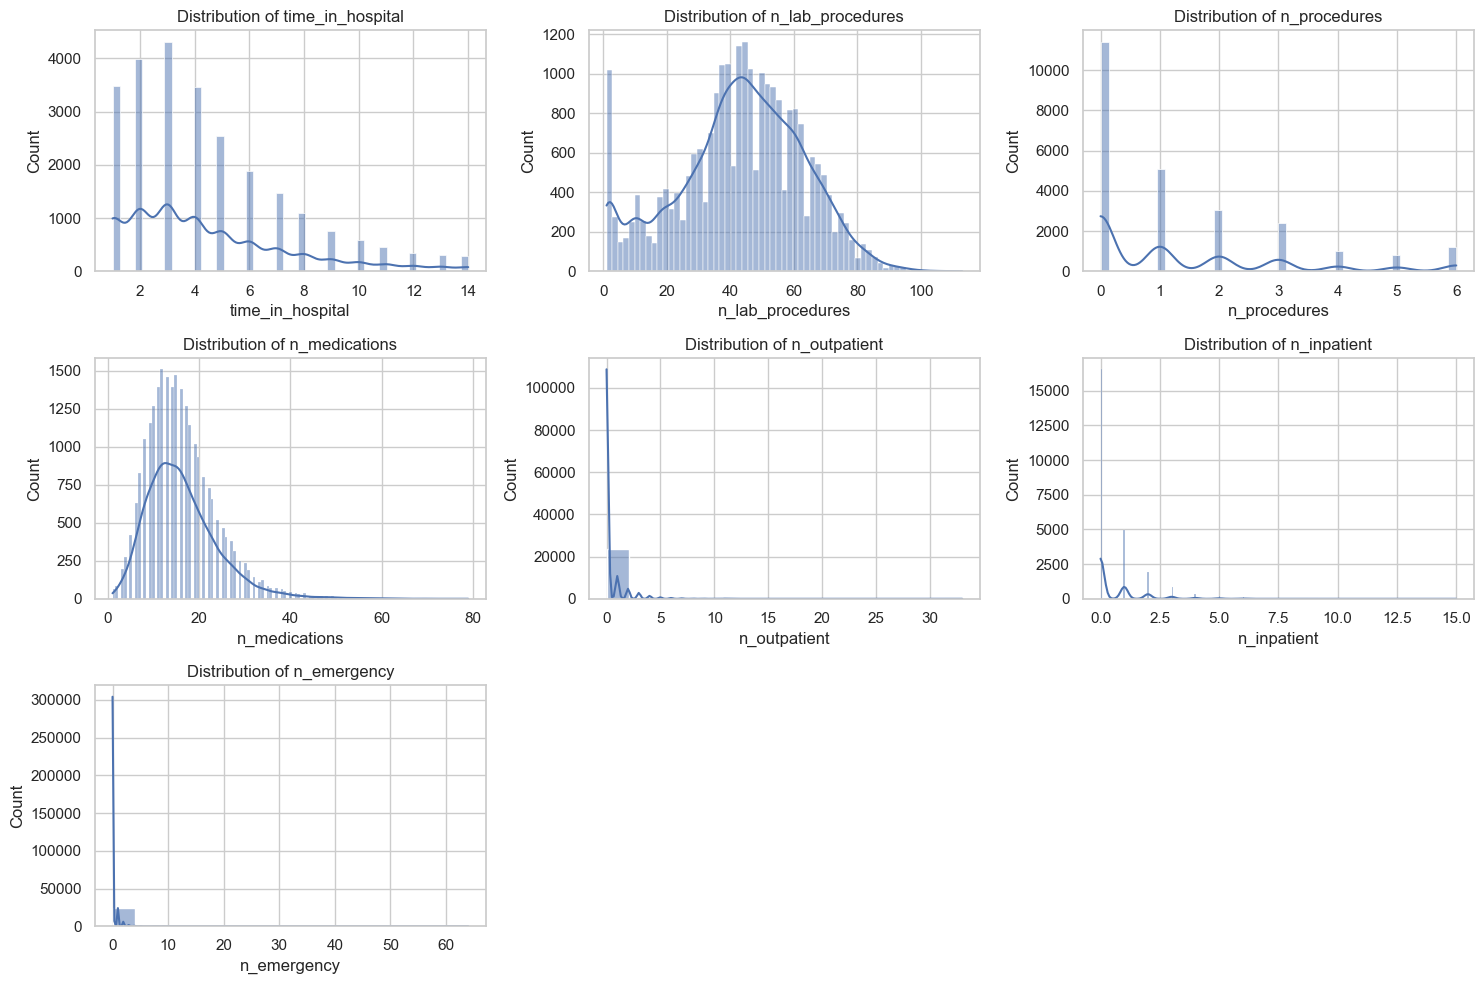

In [9]:
#import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Plot distribution of numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

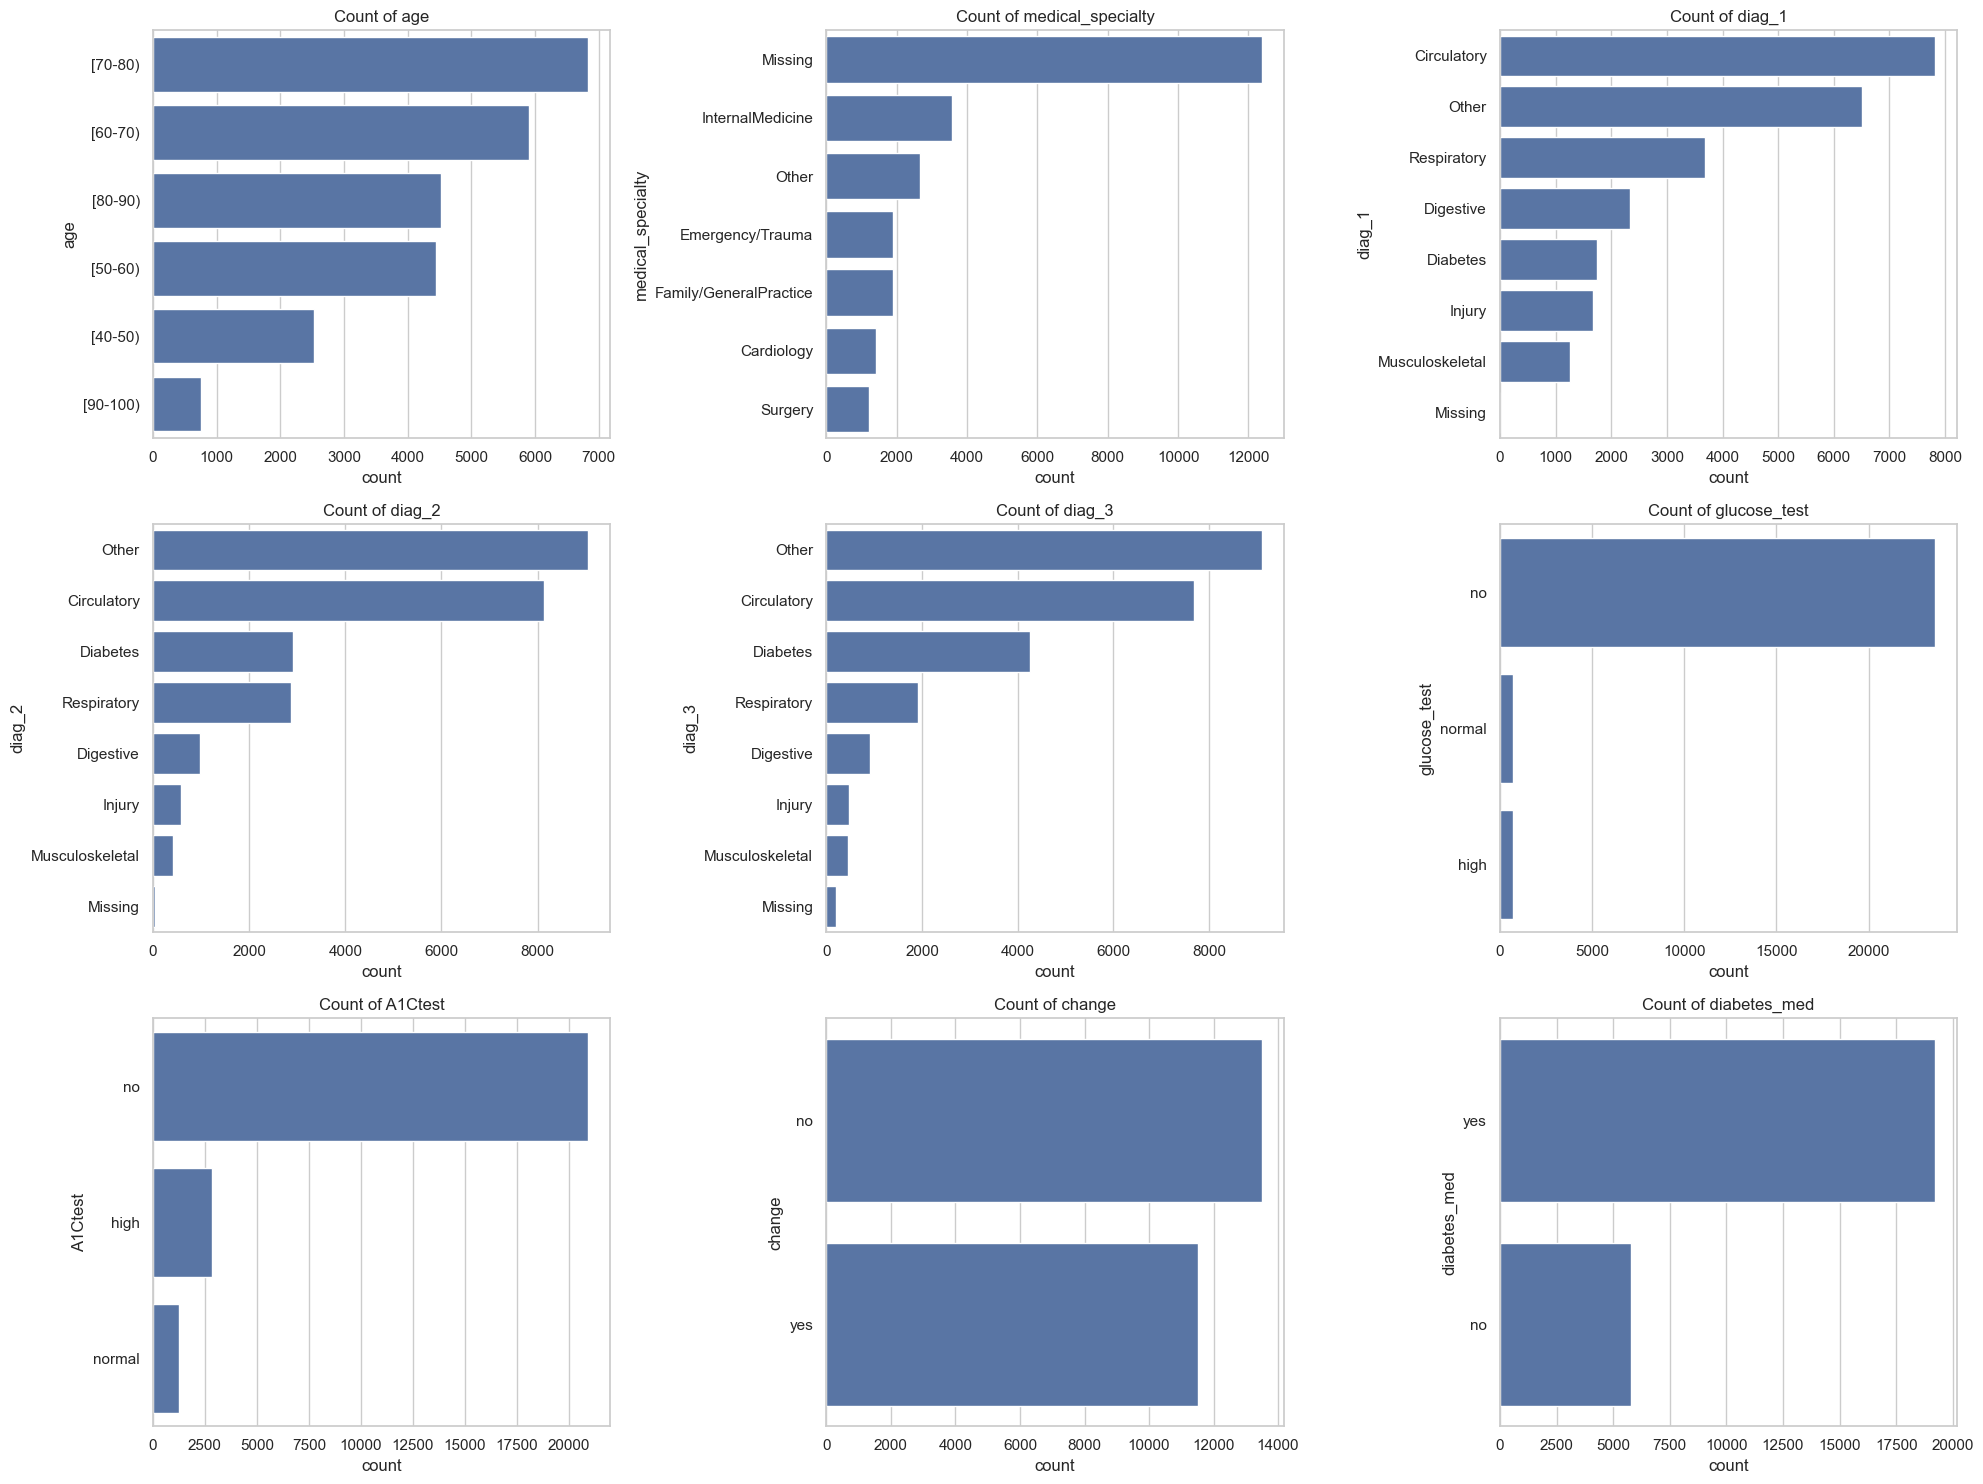

In [47]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()

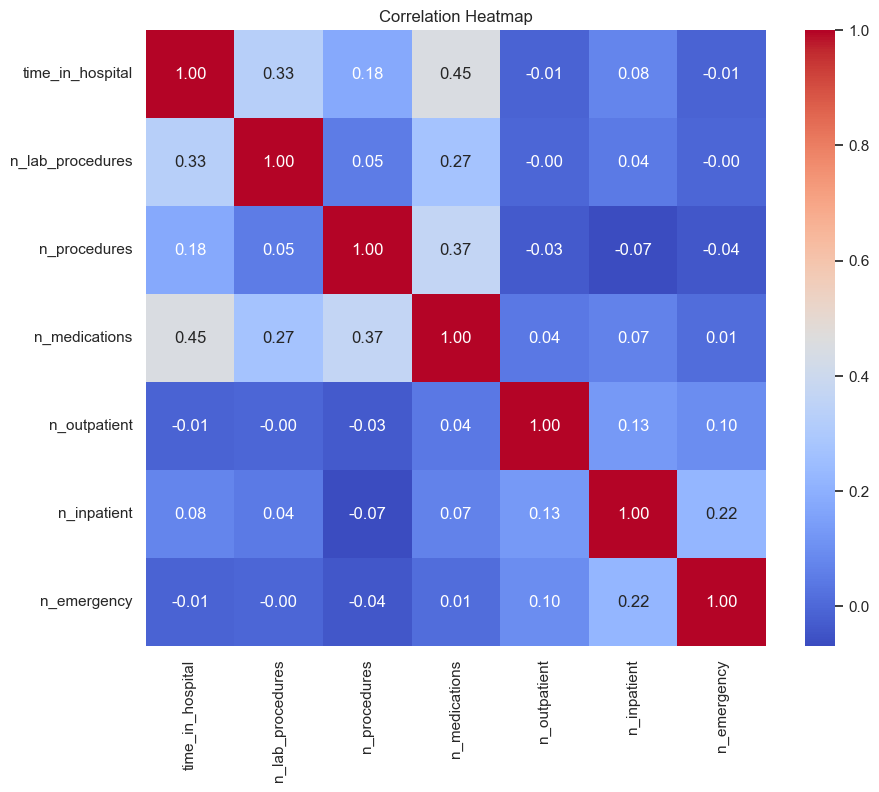

In [10]:
# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

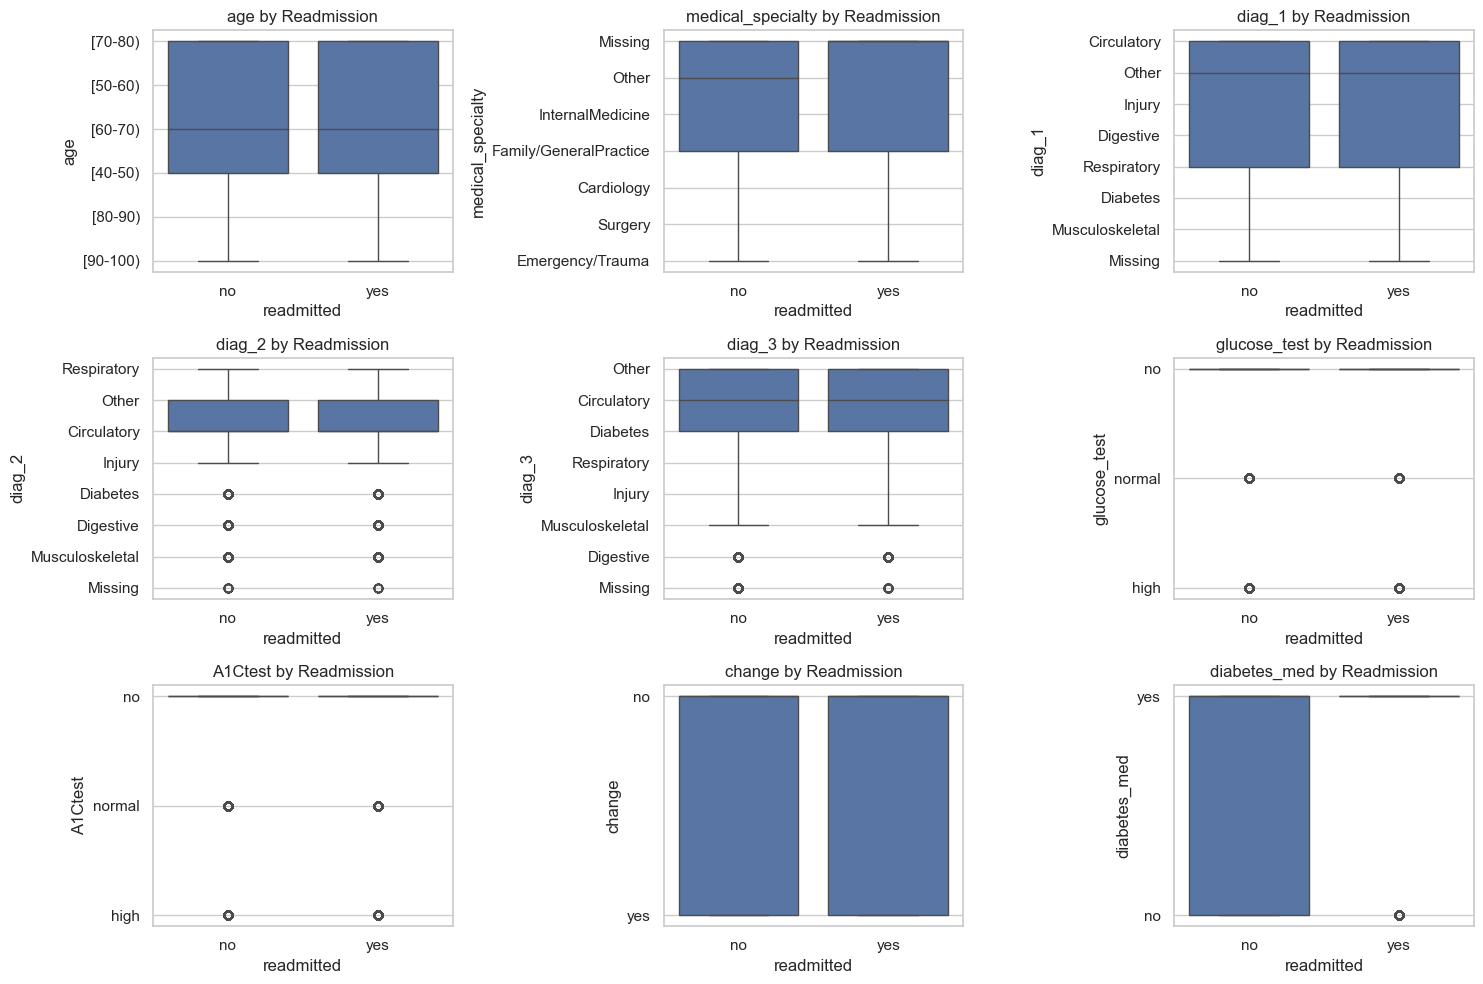

In [11]:
#Boxplot of readmission by Categorical Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='readmitted', y=feature, data=df)
    plt.title(f'{feature} by Readmission')
plt.tight_layout()
plt.show()

In [12]:
# Define features and target variable
X = df.drop('readmitted', axis=1)
y = df['readmitted']

In [13]:
y = y.map({'no': 0, 'yes': 1})

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


# Define the model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

In [53]:
# Define hyperparameters for GridSearch
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

In [57]:
# Train the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['time_in_hospital',
                                                                          'n_lab_procedures',
                                                                          'n_procedures',
                                                                          'n_medications',
                                                                          'n_outpatient',
                                                                          'n_inpatient',
                                                                          'n_emergency']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['age',
                                                                          'medical_specialty',
                                                                          'diag_1',
                                                                          'diag_2',
                                                                          'diag_3',
                                                                          'glucose_test',
                                                                          'A1Ctest',
                                                                          'change',
                                                                          'diabetes_med'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [58]:
# Best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [60]:
# Make predictions using best parameter
y_pred = best_model.predict(X_test)

In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:", accuracy)

Accuracy: 0.6158


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      2658
           1       0.62      0.48      0.54      2342

    accuracy                           0.62      5000
   macro avg       0.62      0.61      0.60      5000
weighted avg       0.62      0.62      0.61      5000



In [63]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [64]:
# Create a DataFrame from the confusion matrix for better readability in the heatmap
cm_df = pd.DataFrame(cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])

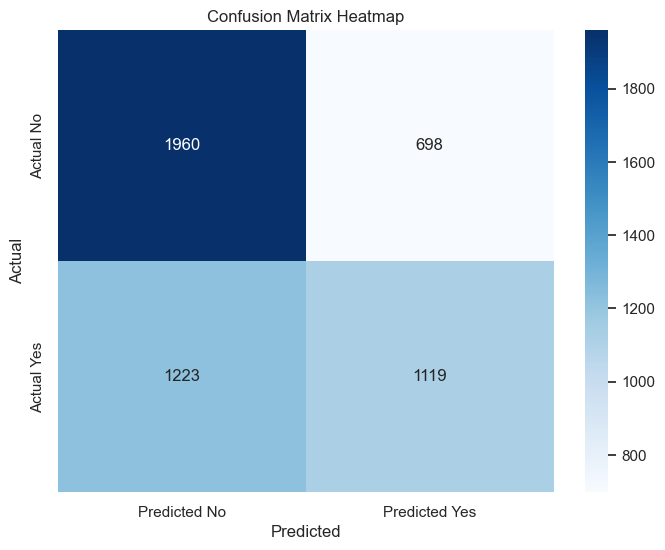

In [65]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [66]:
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Not_readmitted', 'Readmitted']))

Classification Report:
                precision    recall  f1-score   support

Not_readmitted       0.62      0.74      0.67      2658
    Readmitted       0.62      0.48      0.54      2342

      accuracy                           0.62      5000
     macro avg       0.62      0.61      0.60      5000
  weighted avg       0.62      0.62      0.61      5000



In [67]:
actual_counts = y_test.value_counts()
predicted_counts = pd.Series(y_pred).value_counts()

In [68]:
count_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).sort_index()

<Axes: >

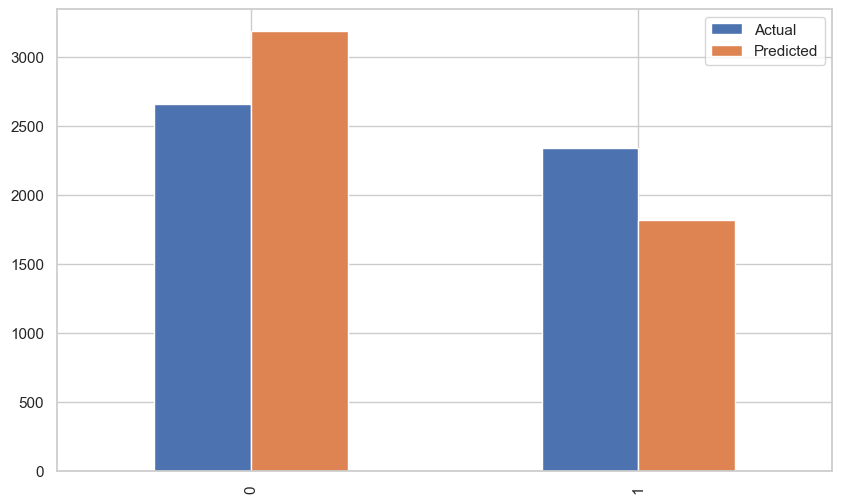

In [69]:
count_df.plot(kind='bar', figsize=(10, 6))

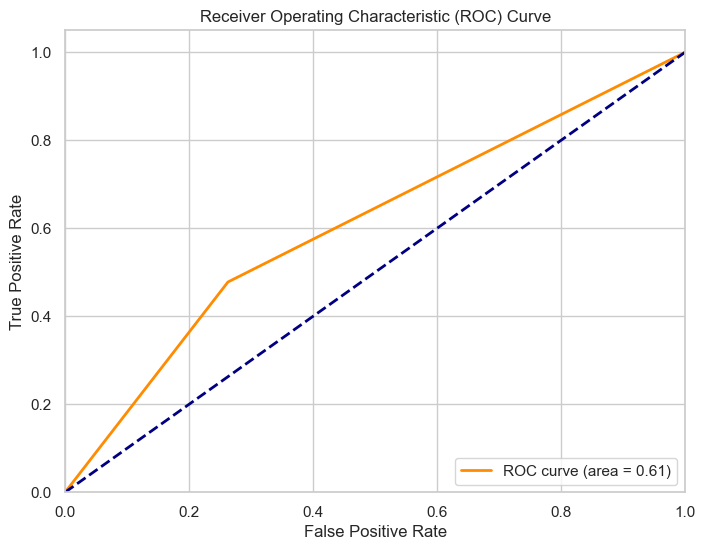

In [70]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


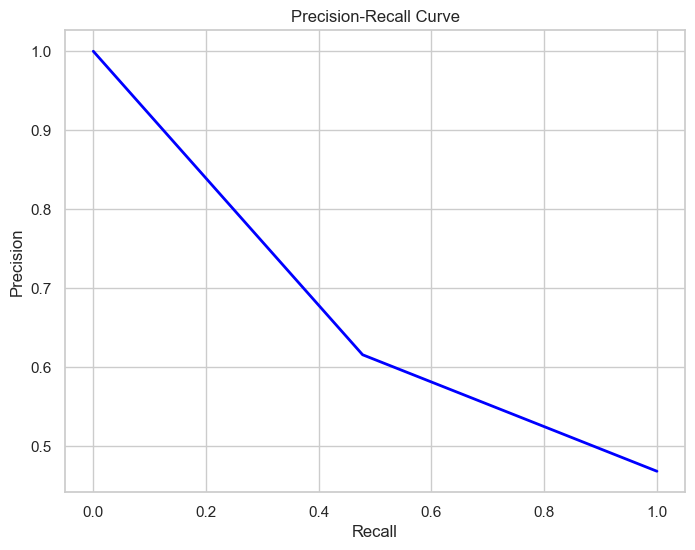

In [71]:
#Plotting precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [72]:
import pickle

# Save the model to a file using pickle
with open('hosp_readm.pkl', 'wb') as file:
    pickle.dump(model, file)